In [2]:
from builtins import range, input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow. keras. applications import VGG16
from tensorflow.keras. applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing. image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
import pandas as pd
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

In [29]:
#define size to which images are to be resized
IMAGE_SIZE = [224, 224]

# training config:
epochs = 10
batch_size = 32

#define paths
covid_path = 'D:/ENETCOM 4/tp3ai/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/COVID'
noncovid_path = 'D:/ENETCOM 4/tp3ai/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/Normal'

# Use glob to grab images from path .jpg or jpeg
covid_files = glob (covid_path + '/*')
noncovid_files = glob(noncovid_path + '/*')

In [4]:
# Visualize file variable contents
print("First 5 Covid Files: ",covid_files [0:5])
print("Total Count: ", len (covid_files))
print("First 5 NonCovid Files: ", noncovid_files [0:5])
print("Total Count: ", len(noncovid_files))

First 5 Covid Files:  ['D:/ENETCOM 4/tp3ai/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/COVID\\COVID-1.png', 'D:/ENETCOM 4/tp3ai/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/COVID\\COVID-10.png', 'D:/ENETCOM 4/tp3ai/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/COVID\\COVID-100.png', 'D:/ENETCOM 4/tp3ai/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/COVID\\COVID-1000.png', 'D:/ENETCOM 4/tp3ai/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/COVID\\COVID-1001.png']
Total Count:  169
First 5 NonCovid Files:  ['D:/ENETCOM 4/tp3ai/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/Normal\\Normal-1.png', 'D:/ENETCOM 4/tp3ai/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/Normal\\Normal-10.png', 'D:/ENETCOM 4/tp3ai/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/Normal\\Normal-100.png', 'D:/ENETCOM 4/tp3ai/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/Normal\\Normal-1000.png', 'D:/ENETCOM 4/tp3ai

In [23]:

covid_labels = []
noncovid_labels = []

covid_images=[]
noncovid_images=[]

for i in range(len(covid_files)):
    image = cv2.imread(covid_files[i])  
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    image = cv2.resize(image, (224, 224))  
    covid_images.append(image)  
    covid_labels.append('D:/ENETCOM 4/tp3ai/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/COVID')  

for i in range(len(noncovid_files)):
    image = cv2.imread(noncovid_files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    noncovid_images.append(image)
    noncovid_labels.append('D:/ENETCOM 4/tp3ai/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/Normal')


In [16]:
image = cv2.resize (image, (224,224) )
noncovid_images.append (image)
noncovid_labels.append ('D:/ENETCOM 4/tp3ai/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/Normal')

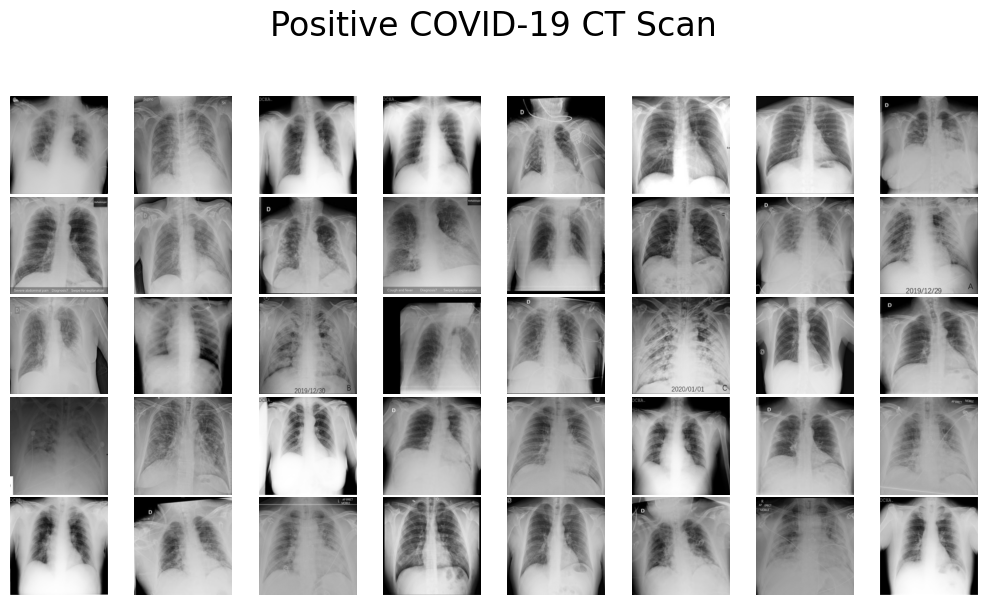

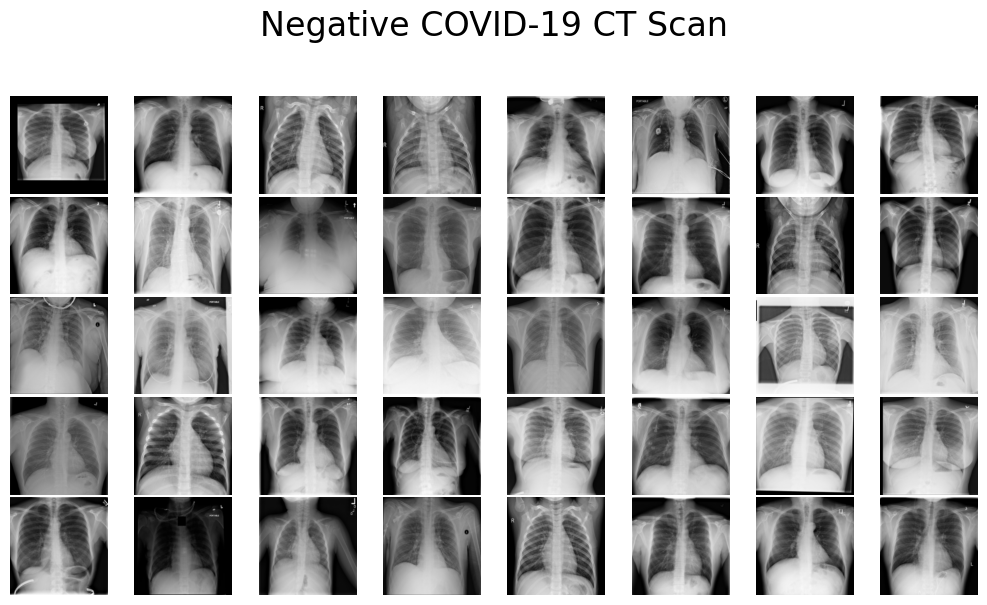

In [18]:
# look at a random image for fun
def plot_images (images, title) :
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1) )

    for i, axi in enumerate(ax.flat) :
        axi.imshow (images [i])
        axi.set_axis_off ()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout (pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show ()
plot_images (covid_images, 'Positive COVID-19 CT Scan')
plot_images (noncovid_images, 'Negative COVID-19 CT Scan')

In [19]:
# Convert to array and Normalize to interval of [0,1]
covid_images = np.array (covid_images) / 255
noncovid_images = np.array (noncovid_images) / 255

In [47]:
# Split into training and testing sets for both types of images
covid_x_train, covid_x_test, covid_y_train, covid_y_test = train_test_split (covid_images, covid_labels, test_size=0.2)
noncovid_x_train, noncovid_x_test, noncovid_y_train, noncovid_y_test =train_test_split (noncovid_images, noncovid_labels, test_size=0.2)

# Merge sets for both types of images
X_train = np. concatenate( (noncovid_x_train, covid_x_train), axis=0)
X_test = np.concatenate((noncovid_x_test, covid_x_test), axis=0)
y_train = np.concatenate( (noncovid_y_train, covid_y_train), axis=0)
y_test = np.concatenate((noncovid_y_test, covid_y_test), axis=0)

# Make labels into categories - either 0 or 1, for our model
y_train = LabelBinarizer().fit_transform(y_train)
y_train = to_categorical(y_train)

y_test = LabelBinarizer().fit_transform(y_test)
y_test = to_categorical(y_test)

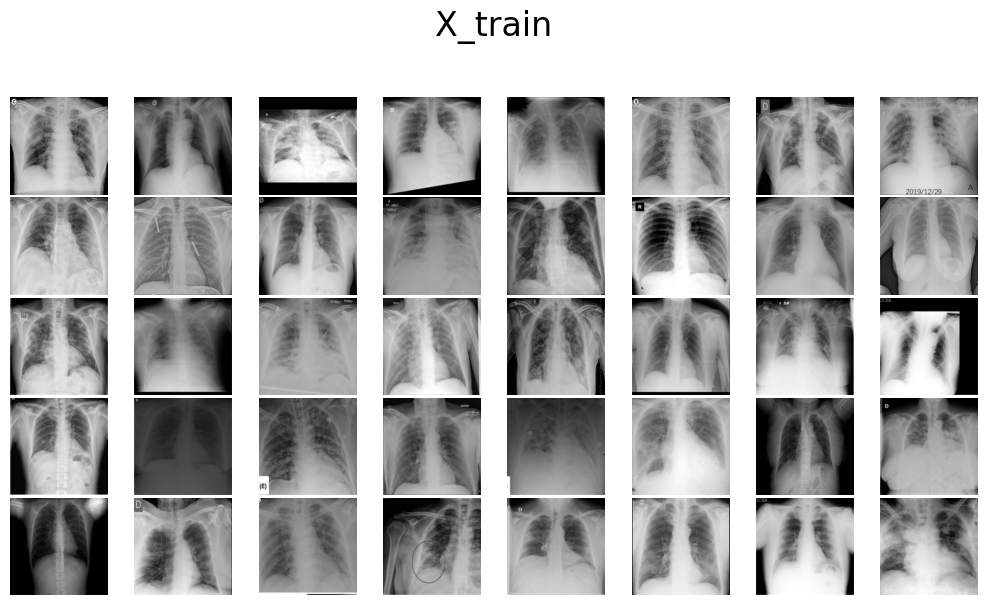

IndexError: list index out of range

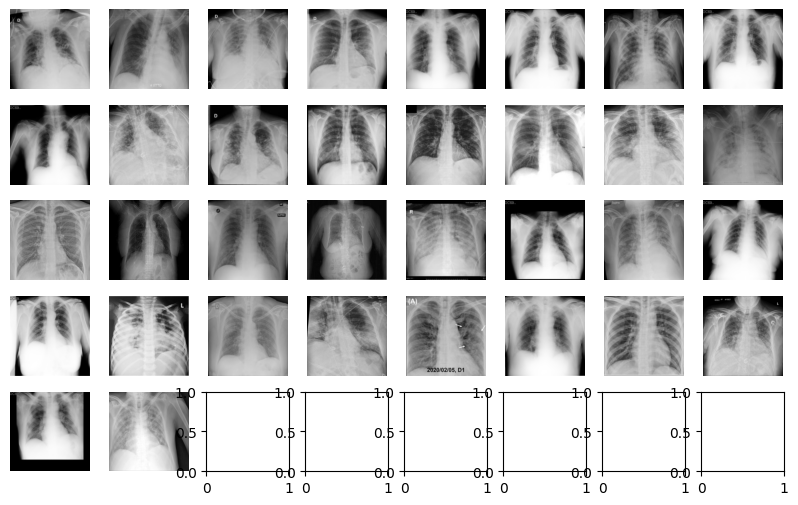

In [48]:
plot_images (covid_x_train, 'X_train')
plot_images (covid_x_test, 'X_test')
# y_train and y_test contain class lables 0 and 1 representing COVID and NonCOVID for X_train and X_test

In [49]:
# Building Model
vggModel = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3) ) )

outputs = vggModel.output
outputs = Flatten(name="flatten") (outputs)
outputs = Dropout(0.5) (outputs)
outputs = Dense(2, activation="sigmoid") (outputs)

model = Model(inputs=vggModel.input, outputs=outputs)

for layer in vggModel.layers:
    layer.trainable = False

model.compile (
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']

)

In [50]:
train_aug = ImageDataGenerator (rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [51]:
history = model.fit(train_aug.flow(X_train, y_train, batch_size= batch_size), validation_data=(X_test, y_test), validation_steps=len(X_test)/batch_size, steps_per_epoch=len(X_train)/batch_size, epochs=epochs)

# Save Model and Weights
model.save('vgg_ct.h5')
model.save_weights('vgg_weights_ct.hdf5')
# Load saved model
model = load_model('vgg_ct.h5')



Epoch 1/10
8/8 [==============================] - 27s 3s/step - loss: 8.4263 - accuracy: 0.6098 - val_loss: 2.7004 - val_accuracy: 0.7761
Epoch 2/10
8/8 [==============================] - 31s 4s/step - loss: 4.5753 - accuracy: 0.7576 - val_loss: 2.4699 - val_accuracy: 0.7910
Epoch 3/10
8/8 [==============================] - 31s 4s/step - loss: 3.7465 - accuracy: 0.8030 - val_loss: 3.0092 - val_accuracy: 0.8060
Epoch 4/10
8/8 [==============================] - 34s 4s/step - loss: 4.0755 - accuracy: 0.8030 - val_loss: 2.1306 - val_accuracy: 0.8358
Epoch 5/10
8/8 [==============================] - 30s 4s/step - loss: 2.5662 - accuracy: 0.8409 - val_loss: 1.4400 - val_accuracy: 0.8507
Epoch 6/10
8/8 [==============================] - 31s 4s/step - loss: 2.6735 - accuracy: 0.8258 - val_loss: 0.9354 - val_accuracy: 0.9254
Epoch 7/10
8/8 [==============================] - 30s 4s/step - loss: 3.0522 - accuracy: 0.8447 - val_loss: 1.9196 - val_accuracy: 0.8806
Epoch 8/10
8/8 [==================

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 5s 1s/step


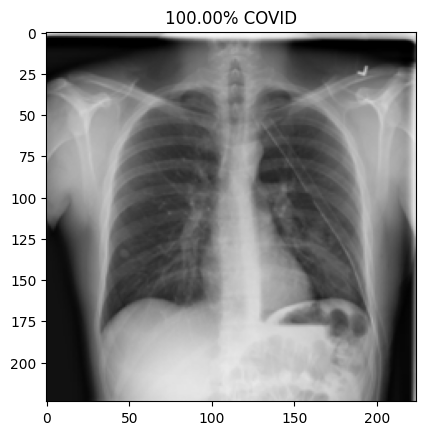

In [52]:
y_pred = model.predict (X_test, batch_size=batch_size)
prediction=y_pred[0:10]
for index, probability in enumerate (prediction) :
    if probability[1] > 0.5:
        plt.title ('%.2f' % (probability[1]*100) + '% COVID')
    else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% NonCOVID')
plt.imshow (X_test [index])
plt. show ()

In [53]:
# Convert to Binary classes
y_pred_bin = np.argmax (y_pred, axis=1)
y_test_bin = np.argmax (y_test, axis=1)

Confusion Matrix without Normalization


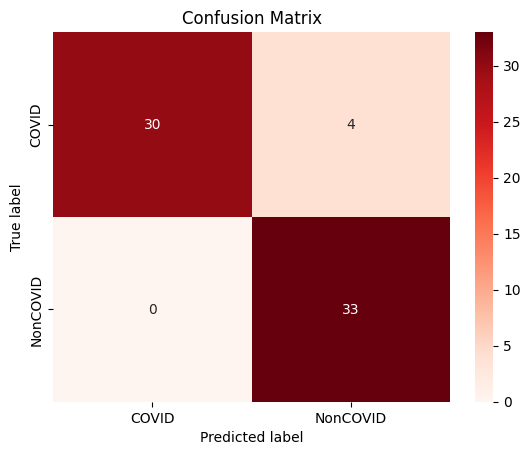

In [54]:
def plot_confusion_matrix (normalize) :
    classes = ['COVID', 'NonCOVID']
    tick_marks = [0.5, 1.5]
    cn = confusion_matrix(y_test_bin, y_pred_bin, normalize=normalize)
    sns.heatmap (cn, cmap='Reds', annot=True)
    plt.xticks (tick_marks, classes)
    plt.yticks (tick_marks, classes)
    plt.title ('Confusion Matrix')
    plt.ylabel ('True label')
    plt.xlabel ('Predicted label')
    plt. show ()

print ('Confusion Matrix without Normalization')
plot_confusion_matrix (normalize=None)

In [55]:
from sklearn.metrics import classification_report
print (classification_report (y_test_bin, y_pred_bin) )

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        34
           1       0.89      1.00      0.94        33

    accuracy                           0.94        67
   macro avg       0.95      0.94      0.94        67
weighted avg       0.95      0.94      0.94        67



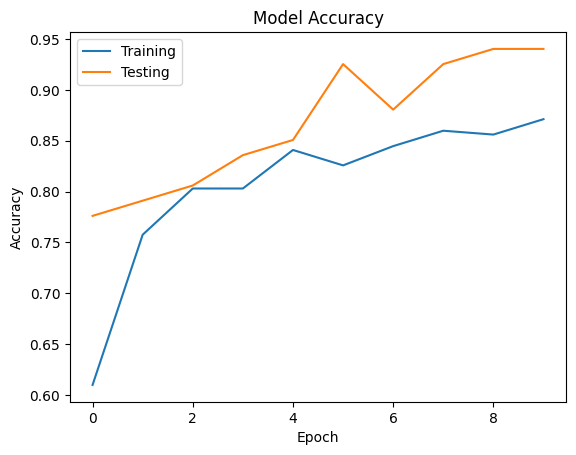

In [56]:
plt.plot (history. history ['accuracy'])
plt.plot (history.history ['val_accuracy'])

plt.title ('Model Accuracy')
plt. ylabel ('Accuracy')
plt.xlabel ('Epoch')

plt.legend (['Training', 'Testing'])
plt.savefig ('vgg_ct_accuracy.png')
plt. show ()